In [ ]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#res=pd.read_csv('res_bron_2020.csv')
#edu=pd.read_csv('edu_bro_2020.csv')
off=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/off_man_2020.csv')
off_19=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/off_man_2019 (1).csv')

In [ ]:
#res.drop('Unnamed: 0',axis=1, inplace=True)
#edu.drop('Unnamed: 0',axis=1, inplace=True)
off.drop('Unnamed: 0',axis=1, inplace=True)
off_19.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
off_19.shape

(1754, 22)

In [ ]:
sc=StandardScaler()
standard=off_19.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:20]]=sc.fit_transform(standard[sub.columns[1:20]])
standard.head()

,score,largest_property_use_type_1,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site,green_power_offsite_kwh,egrid_output_emissions_rate,avoided_emissions_offsite,...,multifamily_housing_total_1,multifamily_housing_number_5,multifamily_housing_number_6,multifamily_housing_number_7,multifamily_housing_percent,water_use_all_water_sources,community_board,census_tract,latitude,longitude
0,80.0,1.699802,1.611917,-0.12966,-3.533610,-0.927795,-0.410070,0.0,0.28293,0.0,...,0.126548,0.120247,0.150685,0.133041,-0.115342,-0.019568,0.257391,-0.247917,40.756631,-73.982826
1,68.0,0.517837,0.749307,-0.12966,0.430908,0.401926,-0.000634,0.0,0.28293,0.0,...,0.126548,0.120247,0.150685,0.133041,-0.115342,0.160628,0.737160,-0.259969,40.750698,-73.974306
2,72.0,1.314060,1.844158,-0.12966,-0.009594,-0.417725,-0.068873,0.0,0.28293,0.0,...,0.126548,0.120247,0.150685,0.133041,-0.115342,-0.019568,0.257391,-0.245584,40.758310,-73.982504
3,63.0,0.623940,0.915194,-0.12966,0.430908,0.525758,0.067605,0.0,0.28293,0.0,...,0.126548,0.120247,0.150685,0.133041,-0.115342,-0.019568,0.737160,-0.259191,40.753074,-73.972753
4,46.0,2.780478,2.175931,-0.12966,0.430908,0.549345,1.193553,0.0,0.28293,0.0,...,0.126548,0.120247,0.150685,0.133041,-0.115342,-0.019568,0.257391,-0.247917,40.756181,-73.986244


In [ ]:
sc=Normalizer()
normalized=off_19.copy()
sub=normalized.select_dtypes(include=[np.number])
normalized[sub.columns[1:20]]=sc.fit_transform(normalized[sub.columns[1:20]])
normalized.head()

,score,largest_property_use_type_1,year_built,number_of_buildings,occupancy,site_eui_kbtu_ft,weather_normalized_site,green_power_offsite_kwh,egrid_output_emissions_rate,avoided_emissions_offsite,...,multifamily_housing_total_1,multifamily_housing_number_5,multifamily_housing_number_6,multifamily_housing_number_7,multifamily_housing_percent,water_use_all_water_sources,community_board,census_tract,latitude,longitude
0,80.0,0.999957,0.002916,0.000001,0.000081,0.000074,0.000016,0.0,0.000125,0.0,...,0.000001,2.407077e-07,0.000055,8.236348e-07,0.000106,0.008742,0.000154,0.000175,40.756631,-73.982826
1,68.0,0.999787,0.005335,0.000003,0.000273,0.000260,0.000036,0.0,0.000231,0.0,...,0.000003,4.463378e-07,0.000101,1.527244e-06,0.000197,0.019941,0.000289,0.000240,40.750698,-73.974306
2,72.0,0.999941,0.003444,0.000002,0.000164,0.000117,0.000022,0.0,0.000147,0.0,...,0.000002,2.833089e-07,0.000064,9.694043e-07,0.000125,0.010289,0.000182,0.000216,40.758310,-73.982504
3,63.0,0.999874,0.004968,0.000003,0.000253,0.000252,0.000035,0.0,0.000215,0.0,...,0.000003,4.145730e-07,0.000094,1.418554e-06,0.000183,0.015057,0.000269,0.000228,40.753074,-73.972753
4,46.0,0.999979,0.002069,0.000001,0.000104,0.000104,0.000021,0.0,0.000088,0.0,...,0.000001,1.693599e-07,0.000038,5.795026e-07,0.000075,0.006151,0.000109,0.000123,40.756181,-73.986244


In [ ]:
X=off.drop('score', axis=1)
y=off['score']
X_n=normalized.drop('score', axis=1)
y_n=normalized['score']
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [ ]:
X_19=off_19.drop('score', axis=1)
y_19=off_19['score']
X_n_19=normalized.drop('score', axis=1)
y_n_19=normalized['score']
X_r_19=standard.drop('score', axis=1)
y_r_19=standard['score']

In [ ]:
# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(953, 23)
(239, 23)
(299, 23)
(953,)
(239,)
(299,)


In [ ]:
# Standardized
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


In [ ]:
# normalized
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size = 0.2, random_state = 42)
X_train_n, X_val_n, y_train_n, y_val_n = train_test_split(X_train_n, y_train_n, test_size=0.20, random_state=1)


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 76.00
Baseline Performance on the test set: MAE = 14.7826


In [ ]:
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']



In [ ]:
def ada(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def ada_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    y_test_pred = regressor.predict(X_test)
    #fit test on extracted features 
    
    #print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    print('MAE test: %.3f'  % mean_absolute_error(y_test, y_test_pred))
    
    #print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    

    # feature_importances = regressor.feature_importances_
    # sorted_idxs = np.argsort(feature_importances)[:5]
    # poss = np.arange(sorted_idxs.shape[0]) + 0.5
    # fig = plt.figure(figsize=(6, 7))
    # plt.subplot(1, 2, 1)
    # plt.barh(poss, feature_importances[sorted_idxs], align="center")
    # plt.yticks(poss, np.array(off.columns)[sorted_idxs])
    # plt.title("Feature Importance (MDI)")    
    
    # fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
ada(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 8.447, val: 9.112
R^2 train: 0.726, val: 0.664


In [ ]:
ada(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 13.526, val: 13.624
R^2 train: 0.457, val: 0.323


In [ ]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 10.911, val: 11.337
R^2 train: 0.638, val: 0.501


MAE test: 8.756
R^2 test: 0.623


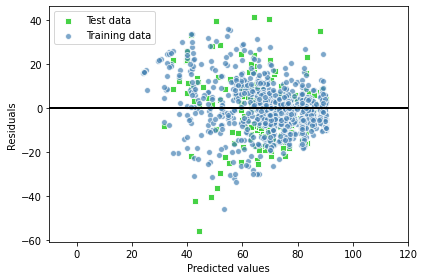

In [ ]:
ada_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def dtree_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 90, 'min_samples_leaf': 9, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    
    y_test_pred=regressor.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(res.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
dtree(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.000, val: 9.707
R^2 train: 1.000, val: 0.519


In [ ]:
dtree(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 0.005, val: 13.366
R^2 train: 1.000, val: 0.088


In [ ]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.005, val: 11.810
R^2 train: 1.000, val: 0.351


MAE test: 8.906
R^2 test: 0.554


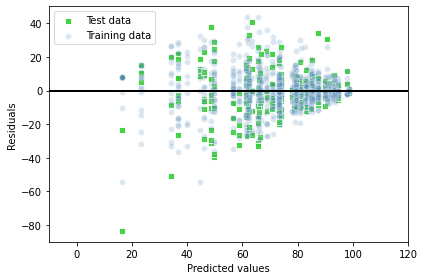

In [ ]:
dtree_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg =  xgboost.XGBRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
from matplotlib import pyplot

In [ ]:
def gbr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    #params = {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}
    #params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.2}
    params={params = }
    #val
    reg = xgboost.XGBRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


SyntaxError: ignored

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check xgboost version
import xgboost

In [ ]:
gbr(X_train, X_val, y_train, y_val, X_test, y_test )

[11:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 5.533, val: 8.000
R^2 train: 0.859, val: 0.688


In [ ]:
gbr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

[11:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 7.935, val: 10.424
R^2 train: 0.777, val: 0.548


In [ ]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[11:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 7.376, val: 9.603
R^2 train: 0.801, val: 0.591


[11:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE test: 7.482
R^2 test: 0.671
Feature: 0, Score: 0.05466
Feature: 1, Score: 0.03912
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.04869
Feature: 4, Score: 0.15867
Feature: 5, Score: 0.10947
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.06230
Feature: 10, Score: 0.08004
Feature: 11, Score: 0.04098
Feature: 12, Score: 0.05685
Feature: 13, Score: 0.02301
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04279
Feature: 16, Score: 0.04755
Feature: 17, Score: 0.04831
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.04082
Feature: 20, Score: 0.04894
Feature: 21, Score: 0.05055
Feature: 22, Score: 0.04725


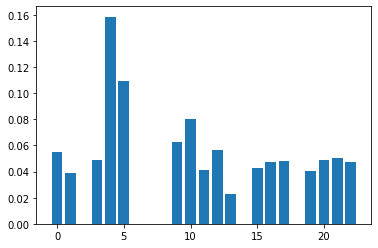

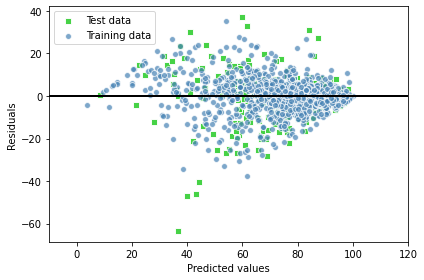

In [ ]:
gbr_h(X_train, X_val, y_train, y_val, X_test, y_test )

In [ ]:
#gbr_h(X_train, X_val, y_train, y_val, X_19, y_19 )

In [ ]:
from sklearn.svm import SVR

In [ ]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):
    params = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))
    

In [ ]:
def svr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_test)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

#     feature_importances = reg.feature_importances_
#     sorted_idxs = np.argsort(feature_importances)[:5]
#     poss = np.arange(sorted_idxs.shape[0]) + 0.5
#     fig = plt.figure(figsize=(6, 7))
#     plt.subplot(1, 2, 1)
#     plt.barh(poss, feature_importances[sorted_idxs], align="center")
#     plt.yticks(poss, np.array(res.columns)[sorted_idxs])
#     plt.title("Feature Importance (MDI)")    
    
#     fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
svr(X_train, X_val, y_train, y_val, X_test, y_test )

MAE train: 0.100, val: 16.183
R^2 train: 1.000, val: 0.008


In [ ]:
svr(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

MAE train: 16.398, val: 15.508
R^2 train: 0.054, val: 0.028


In [ ]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 1.681, val: 11.363
R^2 train: 0.951, val: 0.423


MAE test: 8.547
R^2 test: 0.631


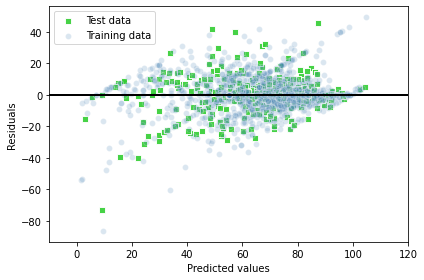

In [ ]:
svr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [ ]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    print(reg.get_params())
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def rf_h(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 200}
    #{'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 500}
    #'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100
    #'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()   
    
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
rf(X_train, X_val, y_train, y_val, X_test, y_test )

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
MAE train: 2.953, val: 7.793
R^2 train: 0.955, val: 0.685


In [ ]:
rf(X_train_n, X_val_n, y_train_n, y_val_n, X_test_n, y_test_n )

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
MAE train: 3.791, val: 10.032
R^2 train: 0.943, val: 0.549


In [ ]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
MAE train: 3.615, val: 9.588
R^2 train: 0.947, val: 0.589


In [ ]:
rf_h(X_train, X_val, y_train, y_val, X_test, y_test )

MAE test: 7.988
R^2 test: 0.640
Feature: 0, Score: 0.08508
Feature: 1, Score: 0.03950
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.03043
Feature: 4, Score: 0.51151
Feature: 5, Score: 0.14416
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00084
Feature: 10, Score: 0.00097
Feature: 11, Score: 0.00042
Feature: 12, Score: 0.00037
Feature: 13, Score: 0.00052
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.03838
Feature: 16, Score: 0.02455
Feature: 17, Score: 0.00813
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01032
Feature: 20, Score: 0.03061
Feature: 21, Score: 0.03748
Feature: 22, Score: 0.03674


NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


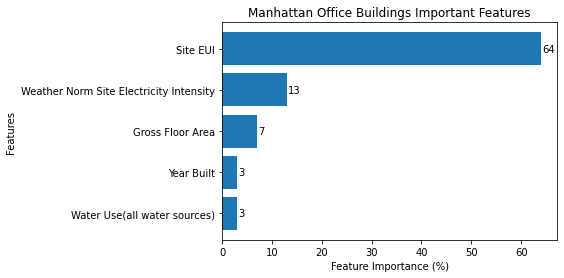

In [ ]:
fea=['Site EUI','Weather Norm Site Electricity Intensity','Gross Floor Area',
 'Year Built',
 'Water Use(all water sources)']
num=[64,13,7,3,3]


fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(fea))


ax.barh(fea, num, )
ax.set_yticks(y_pos, fea)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance (%)')
ax.set_ylabel('Features ')
ax.set_title('Manhattan Office Buildings Important Features')
for i, v in enumerate(num):
    plt.text(v+0.2, i, str(round(v, 2)), va="center")
plt.show()

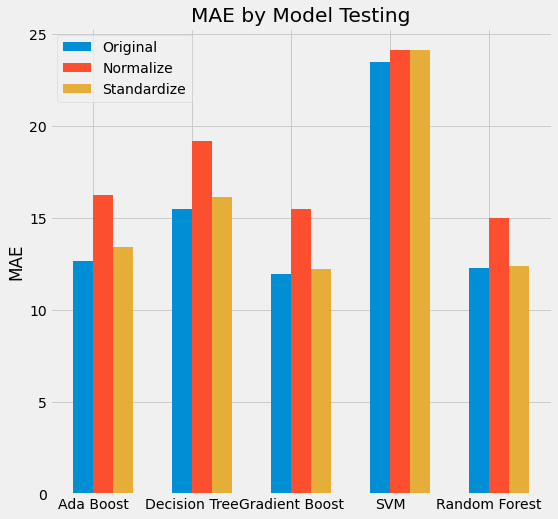

<Figure size 3600x720 with 0 Axes>

In [ ]:
#reg
same=[12.65,15.49,11.94,23.48,12.27]
norm=[16.23,19.16,15.48,24.13,15.01]
stand=[13.45,16.13,12.21,24.12,12.41]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE by Model Testing')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

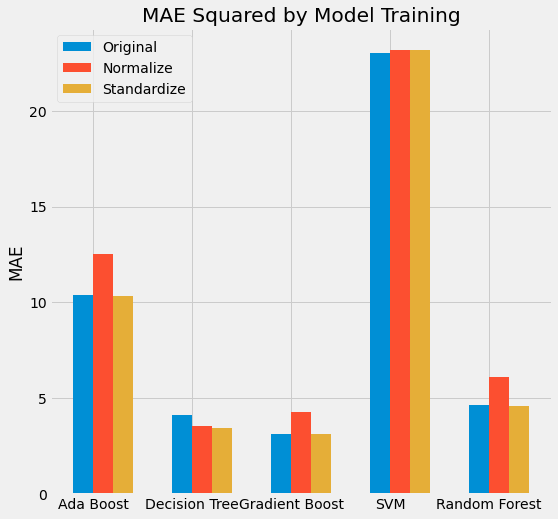

<Figure size 3600x720 with 0 Axes>

In [ ]:
#r2
same=[10.37, 4.11,3.12,23.00,4.66]
norm=[12.50,3.56,4.27,23.16,6.13]
stand=[10.33,3.43,3.12,23.14,4.61]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE Squared by Model Training')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

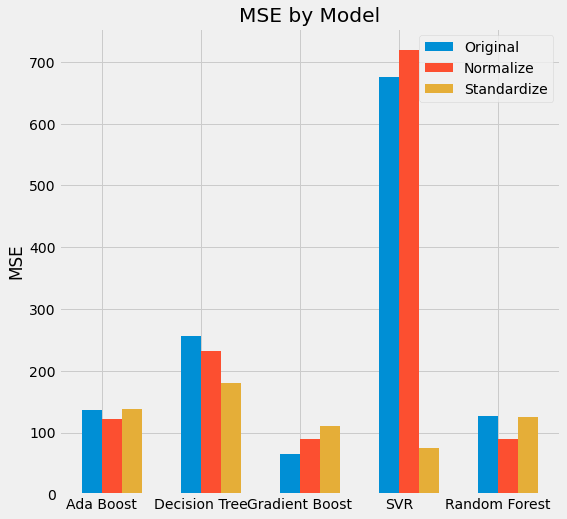

<Figure size 3600x720 with 0 Axes>

In [ ]:
#hyper
same=[136.76,256.92,64.66, 675.61,125.99]
norm=[122.33,232.58,90.25,719.21,89.53]
stand=[137.70,179.62,110.49,74.42,125.71]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

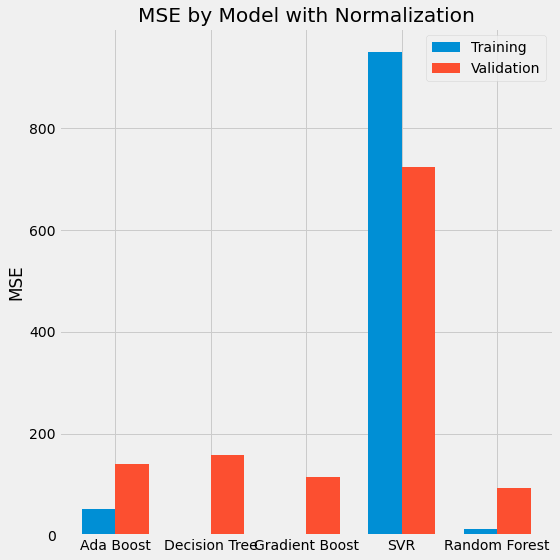

In [ ]:
rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr2, width, label='Training')
rects2 = ax.bar(x + width/2, rte2, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Normalization')
ax.set_xticks(x, nam)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

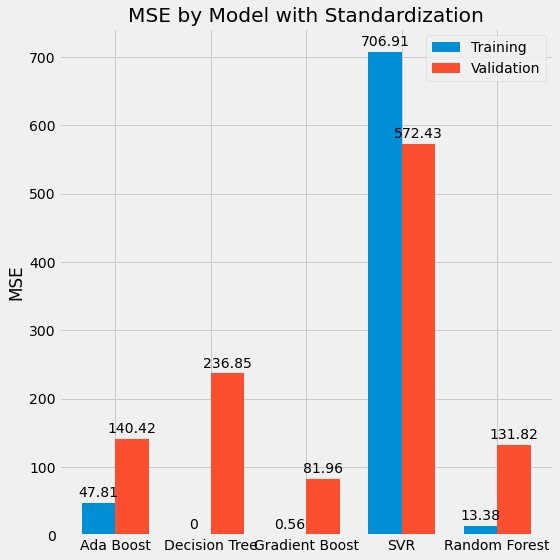

In [ ]:
rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]

x = np.arange(len(nam))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rtr3, width, label='Training')
rects2 = ax.bar(x + width/2, rte3, width, label='Validation')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model with Standardization')
ax.set_xticks(x, nam)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# Define Data
rtr1=[round(num,2) for num in mse_tr1]
rte1=[round(num,2) for num in mse_te1]


rtr2=[round(num,2) for num in mse_tr2]
rte2=[round(num,2) for num in mse_te2]


rtr3=[round(num,2) for num in mse_tr3]
rte3=[round(num,2) for num in mse_te3]


x = np.arange(len(nam)
width = 0.4

# Draw first subplot

plt.subplot(1, 2, 1)
plt.bar(x - width/2, rtr1, width, label='Training')
plt.bar(x + width/2, rte1, width, label='Validation')

# Draw second subplot

plt.subplot(1, 2, 2)
plt.bar(x - width/2, rtr2, width, label='Training')
plt.bar(x + width/2, rte2, width, label='Validation')

              
# plt.subplot(1, 2, 3)
# plt.bar(x - width/2, rtr3, width, label='Training')
# plt.bar(x + width/2, rte3, width, label='Validation')
# Display

plt.show()

SyntaxError: invalid syntax (3669484822.py, line 15)

HYPERPARAMETER TUNING

In [ ]:
import xgboost

In [ ]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
parameters = {'learning_rate': [0.1,0.2,0.3,0.4],
                  'subsample'    : [1,.9,.7, .5, .2, .1],
                  'n_estimators' : [50,100,200,500,1000, 1500],
                  'max_depth'    : [1,2,3,4,6,8,10],
               
                 }

#{ 'learning_rate': 0.1, 'max_depth': 3,  'n_estimators': 100, 'n_jobs': 1,'subsample': 1}

GBR = xgboost.XGBRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

[18:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(max_depth=2, n_estimators=50, subsample=0.5)

 The best score across ALL searched params:
 0.6826643525209235

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.5}


In [ ]:
parameters = {
   'n_estimators': [5,20,50, 100, 200, 500,1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'criterion' :['squared_error', 'absolute_error'],
   'bootstrap' : [True, False],
   "max_depth" : [None,1,3,5,7,9,11,12],
   'min_samples_split' : [1,2,3,5,6,8,10], # minimum sample number to split a node
   "min_samples_leaf":[1,2,3,5,6,8,10]
   
}
#{'criterion': 'squared_error',  'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100,  }

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=90,
                      min_samples_leaf=9, splitter='random')

 The best score across ALL searched params:
 -8.769136978494878

 The best parameters across ALL searched params:
 {'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 90, 'min_samples_leaf': 9, 'splitter': 'random'}


In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=100, gamma=0.01)

 The best score across ALL searched params:
 -7.890935812511266

 The best parameters across ALL searched params:
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100)

 The best score across ALL searched params:
 -8.89748293087711

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
